In [26]:
import pandas as pd
import numpy as np

reviews = pd.read_csv('yelp.csv')
reviews.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [27]:
reviews = reviews.loc[reviews['stars'].isin([1,5])]

In [28]:
X = reviews.text
y = reviews.stars

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
#stop words gets rid of and, a, etc...
count_vect = CountVectorizer(stop_words='english')

count_vect.fit(X_train)
# then we vectorize those speeches
X_train_counts = count_vect.transform(X_train)
X_train_counts.shape

(3064, 16406)

In [38]:
X_train_counts

<3064x16406 sparse matrix of type '<type 'numpy.int64'>'
	with 143562 stored elements in Compressed Sparse Row format>

In [39]:
X_test_counts = count_vect.transform(X_test)
X_test_counts.shape

(1022, 16406)

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
clf.score(X_test_counts, y_test)

0.9227005870841487

In [44]:
y_pred_prod = clf.predict_proba(X_test_counts)

In [49]:
y_pred_prod[0]

array([  2.03418893e-05,   9.99979658e-01])

In [50]:
y_test

array([5, 5, 1, ..., 5, 5, 5])

In [51]:
y_test_binary = y_test

In [52]:
y_test_binary[y_test_binary == 1] = 0

In [53]:
y_test_binary[y_test_binary == 5] = 1

In [54]:
from sklearn import metrics
#just care about proability of it being 1
metrics.roc_auc_score(y_test, y_pred_prod[:, 1])

0.94581204379562056

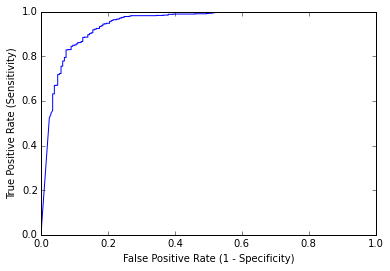

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prod[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')